In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_csv("rolling_stones_spotify.csv")

In [ ]:
print(df.isnull().sum())

In [ ]:
print(df.describe())

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']
X = df[features]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [18]:
optimal_clusters = 4  # Example value; choose based on Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters


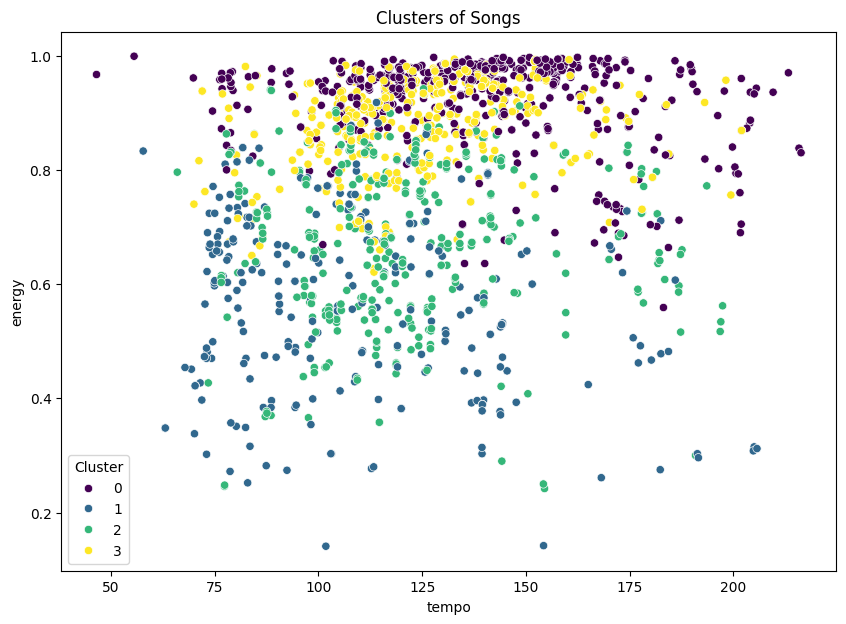

In [20]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='tempo', y='energy', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Songs')
plt.show()

In [ ]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)
df.to_csv('spotify_songs_clustered.csv', index=False)
cluster_summary.to_csv('cluster_summary.csv')